In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv


In [2]:
from IPython.display import display



In [3]:
pd.options.display.max_columns = None


In [12]:
listings_10_22_df = pd.read_csv("../airbnb_listings_sum_oct_4_2022.csv")
listings_10_23_df = pd.read_csv("../airbnb_listings_sum_oct_1_2023.csv")
listings_open_df = pd.read_csv("../Airbnb_Open_Data_26cols.csv", low_memory=False)


df22 = listings_10_22_df.copy()
df23 = listings_10_23_df.copy()
df_open = listings_open_df.copy()

In [13]:
reviews_10_23_df = pd.read_csv("../airbnb_reviews_oct_1_2023.csv")

In [11]:
display(reviews_10_23_df["date"].max())
display(reviews_10_23_df["date"].min())
display(reviews_10_23_df["date"].nunique())

'2023-10-01'

'2009-05-25'

4851

In [7]:
reviews_10_23_df.describe()

,listing_id
count,9.836210e+05
mean,9.722995e+16
std,2.454575e+17
min,2.595000e+03
25%,9.253827e+06
50%,2.536974e+07
75%,4.836571e+07
max,9.898591e+17


In [26]:
listings_calendar_df = pd.read_csv("../airbnb_calendar_oct_1_2023.csv.gz")



In [14]:
listing_big_df = pd.read_csv("../airbnb_listings_oct_1_2023.csv.gz")

In [55]:
# pd.set_option("max_columns", None)

In [18]:
listing_big_df.head(1)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,9630344,https://www.airbnb.com/rooms/9630344,20231001204715,2023-10-02,city scrape,Rental unit in Brooklyn · ★4.80 · 1 bedroom ·...,Enjoy your own private bedroom in our 2 bedroo...,Easy access to subway. Trendy and yet quiet.,https://a0.muscache.com/pictures/496cf3f1-7d0d...,47783628,https://www.airbnb.com/users/show/47783628,Tiffannie,2015-10-30,"New York, NY",NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/5c087...,https://a0.muscache.com/im/pictures/user/5c087...,NaN,1.0,2.0,"['email', 'phone']",t,f,"Brooklyn , New York, United States",Bushwick,Brooklyn,40.68457,-73.91181,Private room in rental unit,Private room,1,NaN,1 shared bath,NaN,1.0,"[""Body soap"", ""Dryer"", ""Refrigerator"", ""Wifi"",...",$65.00,30,30,30,30,30,30,30.0,30.0,NaN,t,29,59,89,364,2023-10-02,5,0,0,2016-08-14,2018-04-30,4.8,4.6,5.0,5.0,5.0,4.8,5.0,NaN,f,1,0,1,0,0.06


In [16]:
listing_big_df["amenities"].sample(25)

37808    ["Microwave", "Self check-in", "Lockbox", "Coo...
21332    ["Microwave", "Cleaning products", "Body soap"...
36457    ["Microwave", "Baking sheet", "Self check-in",...
12801    ["Microwave", "Security cameras on property", ...
36001    ["Microwave", "Baking sheet", "Self check-in",...
20430    ["Drying rack for clothing", "Microwave", "Sel...
16926    ["Smoke alarm", "Shampoo", "First aid kit", "W...
16300    ["Self check-in", "Cleaning products", "Body s...
8426     ["Drying rack for clothing", "Microwave", "Cle...
36616    ["Microwave", "Refrigerator", "Wifi", "Extra p...
23187    ["Wifi", "Kitchen", "Air conditioning", "Heati...
7204     ["Smoke alarm", "Kitchen", "Shampoo", "First a...
18907    ["Microwave", "Self check-in", "Cleaning produ...
25088    ["Smoke alarm", "Kitchen", "Self check-in", "L...
31213    ["Smoke alarm", "Kitchen", "First aid kit", "P...
32142    ["Smoke alarm", "Kitchen", "Cooking basics", "...
7998     ["Microwave", "Cleaning products", "Body soap".

In [39]:
listing_big_df.columns
#review_scores_rating'

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [32]:
#listings_open_df.head()
listings_open_df.describe(include="all")

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
count,1.415910e+07,14159104,14159104,14159104,14159104,1.415909e+07,1.415909e+07
unique,NaN,366,2,3266,3289,NaN,NaN
top,NaN,2023-10-02,f,$150.00,$150.00,NaN,NaN
freq,NaN,38792,8360329,452711,449895,NaN,NaN
mean,2.820218e+17,NaN,NaN,NaN,NaN,3.588470e+01,1.193284e+06
std,3.854931e+17,NaN,NaN,NaN,NaN,4.892888e+01,5.057010e+07
min,2.595000e+03,NaN,NaN,NaN,NaN,1.000000e+00,1.000000e+00
25%,1.976656e+07,NaN,NaN,NaN,NaN,3.000000e+01,3.650000e+02
50%,4.542199e+07,NaN,NaN,NaN,NaN,3.000000e+01,1.125000e+03
75%,7.208630e+17,NaN,NaN,NaN,NaN,3.000000e+01,1.125000e+03


In [36]:
listings_open_df.nunique()
display(listings_open_df["listing_id"].min())

2595

In [33]:
listings_open_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14159104 entries, 0 to 14159103
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 756.2+ MB


In [6]:
# listings df for 2022
df22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40545 entries, 0 to 40544
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              40545 non-null  int64  
 1   name                            40532 non-null  object 
 2   host_id                         40545 non-null  int64  
 3   host_name                       40522 non-null  object 
 4   neighbourhood_group             40545 non-null  object 
 5   neighbourhood                   40545 non-null  object 
 6   latitude                        40545 non-null  float64
 7   longitude                       40545 non-null  float64
 8   room_type                       40545 non-null  object 
 9   price                           40545 non-null  int64  
 10  minimum_nights                  40545 non-null  int64  
 11  number_of_reviews               40545 non-null  int64  
 12  last_review                     

In [7]:
df22.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,4.054500e+04,4.054500e+04,40545.000000,40545.000000,40545.000000,40545.000000,40545.000000,32155.000000,40545.000000,40545.000000,40545.000000
mean,1.322763e+17,1.332881e+08,40.728697,-73.945322,201.153730,19.061734,26.844148,1.286806,18.133901,134.619065,7.944654
std,2.622708e+17,1.474335e+08,0.058812,0.058498,366.476189,31.899106,56.486804,1.991431,62.874935,139.719582,18.643832
min,2.539000e+03,2.438000e+03,40.500314,-74.269520,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.674078e+07,1.401186e+07,40.687570,-73.983340,80.000000,2.000000,1.000000,0.140000,1.000000,0.000000,0.000000
50%,3.916942e+07,6.062672e+07,40.724430,-73.953500,133.000000,14.000000,5.000000,0.580000,1.000000,83.000000,1.000000
75%,5.312715e+07,2.255155e+08,40.763170,-73.925000,220.000000,30.000000,26.000000,1.890000,4.000000,287.000000,8.000000
max,7.301517e+17,4.819948e+08,40.928810,-73.690060,17710.000000,1250.000000,1553.000000,118.290000,464.000000,365.000000,921.000000


In [19]:
df22.describe(include="all")

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,4.054500e+04,40532,4.054500e+04,40522,40545,40545,40545.000000,40545.000000,40545,40545.000000,40545.000000,40545.000000,32155,32155.000000,40545.000000,40545.000000,40545.000000,5
unique,NaN,39337,NaN,9577,5,244,NaN,NaN,4,NaN,NaN,NaN,2674,NaN,NaN,NaN,NaN,5
top,NaN,Water View King Bed Hotel Room,NaN,Blueground,Manhattan,Bedford-Stuyvesant,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2022-10-02,NaN,NaN,NaN,NaN,41662/AL
freq,NaN,30,NaN,464,17067,2785,NaN,NaN,23180,NaN,NaN,NaN,945,NaN,NaN,NaN,NaN,1
mean,1.322763e+17,NaN,1.332881e+08,NaN,NaN,NaN,40.728697,-73.945322,NaN,201.153730,19.061734,26.844148,NaN,1.286806,18.133901,134.619065,7.944654,NaN
std,2.622708e+17,NaN,1.474335e+08,NaN,NaN,NaN,0.058812,0.058498,NaN,366.476189,31.899106,56.486804,NaN,1.991431,62.874935,139.719582,18.643832,NaN
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.500314,-74.269520,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000,0.000000,NaN
25%,1.674078e+07,NaN,1.401186e+07,NaN,NaN,NaN,40.687570,-73.983340,NaN,80.000000,2.000000,1.000000,NaN,0.140000,1.000000,0.000000,0.000000,NaN
50%,3.916942e+07,NaN,6.062672e+07,NaN,NaN,NaN,40.724430,-73.953500,NaN,133.000000,14.000000,5.000000,NaN,0.580000,1.000000,83.000000,1.000000,NaN
75%,5.312715e+07,NaN,2.255155e+08,NaN,NaN,NaN,40.763170,-73.925000,NaN,220.000000,30.000000,26.000000,NaN,1.890000,4.000000,287.000000,8.000000,NaN


In [10]:
# listings df for 2023
df23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38792 entries, 0 to 38791
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38792 non-null  int64  
 1   name                            38792 non-null  object 
 2   host_id                         38792 non-null  int64  
 3   host_name                       38787 non-null  object 
 4   neighbourhood_group             38792 non-null  object 
 5   neighbourhood                   38792 non-null  object 
 6   latitude                        38792 non-null  float64
 7   longitude                       38792 non-null  float64
 8   room_type                       38792 non-null  object 
 9   price                           38792 non-null  int64  
 10  minimum_nights                  38792 non-null  int64  
 11  number_of_reviews               38792 non-null  int64  
 12  last_review                     

In [25]:
df23.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Rental unit in New York · ★4.68 · Studio · 1 b...,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240,30,49,2022-06-21,0.29,3,351,0,NaN
1,5121,Rental unit in Brooklyn · ★4.52 · 1 bedroom · ...,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,66,30,50,2019-12-02,0.29,2,151,0,NaN
2,6848,Rental unit in Brooklyn · ★4.58 · 2 bedrooms ·...,15991,Allen & Irina,Brooklyn,Williamsburg,40.70935,-73.95342,Entire home/apt,81,30,191,2023-08-14,1.09,1,79,5,NaN
3,6872,Condo in New York · 1 bedroom · 1 bed · 1 shar...,16104,Kae,Manhattan,East Harlem,40.80107,-73.94255,Private room,65,30,1,2022-06-05,0.06,2,295,0,NaN
4,7064,Loft in Brooklyn · ★4.91 · 1 bedroom · 1 bed ·...,17297,Joelle,Brooklyn,Williamsburg,40.71248,-73.95881,Private room,95,30,13,2022-09-12,0.08,2,26,0,NaN


In [9]:
df23.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,3.879200e+04,3.879200e+04,38792.000000,38792.000000,38792.000000,38792.000000,38792.000000,28440.000000,38792.000000,38792.000000,38792.000000
mean,2.820216e+17,1.558350e+08,40.729379,-73.945829,215.945891,30.639977,25.356285,1.078758,38.581563,148.752629,6.946896
std,3.854980e+17,1.676485e+08,0.056725,0.055115,496.013612,26.633260,55.852480,1.651815,113.306079,142.257519,16.626580
min,2.595000e+03,1.678000e+03,40.500314,-74.251907,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.976673e+07,1.643725e+07,40.688790,-73.982820,79.000000,30.000000,0.000000,0.110000,1.000000,0.000000,0.000000
50%,4.542122e+07,7.616643e+07,40.726290,-73.953886,135.000000,30.000000,4.000000,0.410000,1.000000,120.000000,0.000000
75%,7.208503e+17,2.754027e+08,40.762672,-73.926209,225.000000,30.000000,24.000000,1.520000,6.000000,300.000000,5.000000
max,9.927295e+17,5.395985e+08,40.911380,-73.713650,30000.000000,1250.000000,1843.000000,62.820000,602.000000,365.000000,814.000000


In [17]:
df23.describe(include="all")

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,3.879200e+04,38792,3.879200e+04,38787,38792,38792,38792.000000,38792.000000,38792,38792.000000,38792.000000,38792.000000,28440,28440.000000,38792.000000,38792.000000,38792.000000,2939
unique,NaN,12050,NaN,8828,5,223,NaN,NaN,4,NaN,NaN,NaN,2924,NaN,NaN,NaN,NaN,278
top,NaN,Rental unit in New York · 1 bedroom · 1 bed · ...,NaN,Blueground,Manhattan,Bedford-Stuyvesant,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2023-09-04,NaN,NaN,NaN,NaN,Exempt
freq,NaN,2016,NaN,602,16905,2740,NaN,NaN,21319,NaN,NaN,NaN,654,NaN,NaN,NaN,NaN,2505
mean,2.820216e+17,NaN,1.558350e+08,NaN,NaN,NaN,40.729379,-73.945829,NaN,215.945891,30.639977,25.356285,NaN,1.078758,38.581563,148.752629,6.946896,NaN
std,3.854980e+17,NaN,1.676485e+08,NaN,NaN,NaN,0.056725,0.055115,NaN,496.013612,26.633260,55.852480,NaN,1.651815,113.306079,142.257519,16.626580,NaN
min,2.595000e+03,NaN,1.678000e+03,NaN,NaN,NaN,40.500314,-74.251907,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000,0.000000,NaN
25%,1.976673e+07,NaN,1.643725e+07,NaN,NaN,NaN,40.688790,-73.982820,NaN,79.000000,30.000000,0.000000,NaN,0.110000,1.000000,0.000000,0.000000,NaN
50%,4.542122e+07,NaN,7.616643e+07,NaN,NaN,NaN,40.726290,-73.953886,NaN,135.000000,30.000000,4.000000,NaN,0.410000,1.000000,120.000000,0.000000,NaN
75%,7.208503e+17,NaN,2.754027e+08,NaN,NaN,NaN,40.762672,-73.926209,NaN,225.000000,30.000000,24.000000,NaN,1.520000,6.000000,300.000000,5.000000,NaN


In [58]:
df_open.head(2)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN


In [11]:
df_open.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [16]:
df_open.describe()

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102385.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,2012.487464,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,1.625751e+07,2.853900e+10,0.055857,0.049521,5.765556,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


In [15]:
df_open.describe(include="all")

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
count,1.025990e+05,102349,1.025990e+05,102310,102193,102570,102583,102591.000000,102591.000000,102067,...,102326,102190.000000,102416.000000,86706,86720.000000,102273.000000,102280.000000,102151.000000,50468,2
unique,NaN,61281,NaN,2,13190,7,224,NaN,NaN,1,...,231,NaN,NaN,2477,NaN,NaN,NaN,NaN,1976,1
top,NaN,Home away from home,NaN,unconfirmed,Michael,Manhattan,Bedford-Stuyvesant,NaN,NaN,United States,...,$41,NaN,NaN,6/23/2019,NaN,NaN,NaN,NaN,#NAME?,41662/AL
freq,NaN,33,NaN,51200,881,43792,7937,NaN,NaN,102067,...,526,NaN,NaN,2443,NaN,NaN,NaN,NaN,2712,2
mean,2.914623e+07,NaN,4.925411e+10,NaN,NaN,NaN,NaN,40.728094,-73.949644,NaN,...,NaN,8.135845,27.483743,NaN,1.374022,3.279106,7.936605,141.133254,NaN,NaN
std,1.625751e+07,NaN,2.853900e+10,NaN,NaN,NaN,NaN,0.055857,0.049521,NaN,...,NaN,30.553781,49.508954,NaN,1.746621,1.284657,32.218780,135.435024,NaN,NaN
min,1.001254e+06,NaN,1.236005e+08,NaN,NaN,NaN,NaN,40.499790,-74.249840,NaN,...,NaN,-1223.000000,0.000000,NaN,0.010000,1.000000,1.000000,-10.000000,NaN,NaN
25%,1.508581e+07,NaN,2.458333e+10,NaN,NaN,NaN,NaN,40.688740,-73.982580,NaN,...,NaN,2.000000,1.000000,NaN,0.220000,2.000000,1.000000,3.000000,NaN,NaN
50%,2.913660e+07,NaN,4.911774e+10,NaN,NaN,NaN,NaN,40.722290,-73.954440,NaN,...,NaN,3.000000,7.000000,NaN,0.740000,3.000000,1.000000,96.000000,NaN,NaN
75%,4.320120e+07,NaN,7.399650e+10,NaN,NaN,NaN,NaN,40.762760,-73.932350,NaN,...,NaN,5.000000,30.000000,NaN,2.000000,4.000000,2.000000,269.000000,NaN,NaN


([<matplotlib.axis.XTick at 0x18ecddfece0>,
 [Text(1, 0, '2022'), Text(2, 0, '2023')])

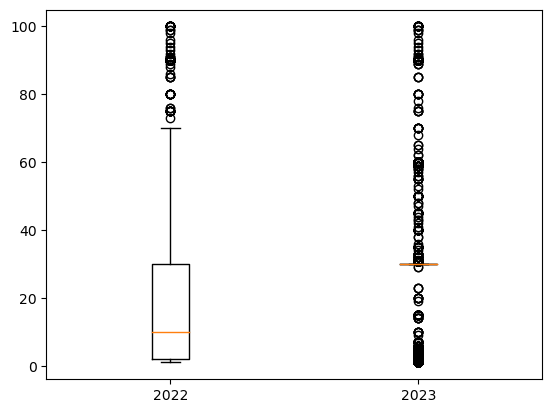

In [21]:
# boxplot of minimums nights for october 2022 and 2023

x1 = df22["minimum_nights"][df22["minimum_nights"]<=100]
x2 = df23["minimum_nights"][df23["minimum_nights"]<=100]

# df22["minimum_nights"][df22["minimum_nights"]<=100].plot.box()
# df23["minimum_nights"][df23["minimum_nights"]<=100].plot.box()

plt.boxplot([x1, x2])
plt.xticks([1, 2], labels= ["2022", "2023"])

In [30]:
display(df22["minimum_nights"].count())
display(df23["minimum_nights"].count())
display(df22["minimum_nights"][df22["minimum_nights"]!=30].count())
display(df22["minimum_nights"][df22["minimum_nights"]==30].count())
display(df23["minimum_nights"][df23["minimum_nights"]!=30].count())
display(df23["minimum_nights"][df23["minimum_nights"]==30].count())

total22 = df22["minimum_nights"].count()
total23 = df23["minimum_nights"].count()
count30_22 = df22["minimum_nights"][df22["minimum_nights"]==30].count() 
morethan30_22 = df22["minimum_nights"][df22["minimum_nights"]>=30].count() 
count30_23 = df23["minimum_nights"][df23["minimum_nights"]==30].count()
morethan30_23 = df23["minimum_nights"][df23["minimum_nights"]>=30].count()

ratio30_22 = count30_22/total22
ratio30_23 = count30_23/total23
ratiomore30_22 = morethan30_22/total22
ratiomore30_23 = morethan30_23/total23

print(f"In 2022: There were {count30_22} listings for a minimum of 30 days, {round(ratio30_22 * 100, 1)}% of total listings")
print(f"In 2023: There are {count30_23} listings for a minimum of 30 days, {round(ratio30_23 * 100, 1)}% of total listings")
print(f"In 2022: There were {morethan30_22} listings for a minimum of 30 days or more, {round(ratiomore30_22 * 100, 1)}% of total")
print(f"In 2022: There were {morethan30_23} listings for a minimum of 30 days or more, {round(ratiomore30_23 * 100, 1)}% of total")
      

40545

38792

23289

17256

5519

33273

In 2022: There were 17256 listings for a minimum of 30 days, 42.6% of total listings
In 2023: There are 33273 listings for a minimum of 30 days, 85.8% of total listings
In 2022: There were 19231 listings for a minimum of 30 days or more, 47.4% of total
In 2022: There were 35565 listings for a minimum of 30 days or more, 91.7% of total
